In [1]:
import pgrtk
import os
import matplotlib.pyplot as plt
from IPython.display import SVG
%matplotlib inline

In [2]:
pgrtk.__version__

'pgrtk 0.4.0-dev (main:87d3fbe, release build, linux [x86_64] [rustc 1.62.0 (a8314ef7d 2022-06-27)])'

In [3]:
os.chdir("/results")

In [4]:
import glob

In [5]:
fns = glob.glob("/code/MHC/D*.fasta")

In [6]:
shmmrspec = {"w": 56, "k":56, "r":1, "min_span":28 }
sdb = pgrtk.SeqIndexDB()
sdb.load_from_fastx("/results/pgr-out/pg_seqs.000.fa",
                    w = shmmrspec["w"], 
                    k = shmmrspec["k"], 
                    r = shmmrspec["r"], 
                    min_span = shmmrspec["min_span"])

In [7]:
included = set()
with open("/results/pgr-out/MHC-C2_included_ctgs.000") as f:
    for row in f:
        row = row.strip()
        included.add(row)

In [8]:
seq_gene_coord = {}
gene_names = set()
with open("/results/pgr-out/MHC_C2_gene_matches.bed") as f:
    for r in f:
        r = r.strip().split()
        if r[0] not in included:
            continue
        seq_gene_coord.setdefault(r[0], [])
        seq_gene_coord[r[0]].append( (int(r[1]), int(r[2]), r[3]) )
        gene_names.add(r[3])
gene_names = list(gene_names)
gene_names.sort()  

In [9]:
gene_names

[]

In [10]:
f = open(f"/wd/results/pgr-out/MHC-C2_gene_annotation.1.ord", "w")
for ctg_name in seq_gene_coord:
 
    seq_gene_coord[ctg_name].sort()
    
    annotation = []
    for bgn, end, gene2 in seq_gene_coord[ctg_name]:
        annotation.append(gene2)
    name = ".".join(ctg_name.split(".")[:2])
    print(ctg_name, name+"::"+"-".join(annotation), sep="\t", file=f)
f.close()

In [11]:
import os

In [12]:
q_idx="000"
q_name="MHC-C2"
fasta_file = f"/wd/results/pgr-out/pg_seqs.{q_idx}.fa"
prefix = f"{q_name}_pg_seqs.{q_idx}."
bed_file = f"/wd/results/pgr-out/{prefix}bed"
track_range=1000000
os.system(f"""/wd/code/pgr-pbundle-bed2svg {bed_file} /wd/results/pgr-out/svg/{prefix}hc.1. \
          --track-range {track_range} --track-tick-interval 100000 \
          --track-panel-width 1200 --annotation-panel-width 600 --stroke-width 1.2 \
          --annotations /wd/results/pgr-out/MHC-C2_gene_annotation.1.ord --ddg-file /wd/results/pgr-out/{prefix}ddg""")

0

In [13]:
SVG(f"/wd/results/pgr-out/svg/{prefix}hc.1.svg")

In [14]:
seq_gene_coord;

In [15]:
sinfo = sdb.seq_info.copy()
for gene in gene_names:
    f = open(f"/results/pgr-out/MHC_gene_{gene}_seqs.fa", "w")
    for sid in sinfo:
        ctg_name = sinfo[sid][0]
       
        if ctg_name not in seq_gene_coord:
            continue
            

        for bgn, end, gene2 in seq_gene_coord[ctg_name]:
            if gene2 != gene:
                continue
            seq = sdb.get_sub_seq_by_id(sid, bgn-56, end+56)
            #print(end-bgn)
            seq = pgrtk.u8_to_string(seq)
            print(f">{gene}_{ctg_name}:{bgn}_{end}",file=f)
            print(seq, file=f)
            
        

In [16]:
%%time
fns = glob.glob("/results/pgr-out/MHC_gene*.fa")

for fn in fns:
    prefix = "_".join(fn.split("/")[-1].split("_")[:3])
    sdb = pgrtk.SeqIndexDB()
    sdb.load_from_fastx(fn, w=56, k=56, r=1, min_span=0)
    
    sdb.generate_mapg_gfa(0, f"/results/{prefix}_gen.gfa")
    sdb.write_mapg_idx(f"/results/{prefix}_gen.gidx")

CPU times: user 934 µs, sys: 70 µs, total: 1 ms
Wall time: 680 µs


In [17]:
type_maping = {}
fns = glob.glob("/code/MHC/*.fasta")
for fn in fns:
    with open(fn) as f:
        for r in f:
            if r[0] != ">":
                continue
            r = r.strip().split()
            type_maping[r[0][1:]] = r[1].split(":")[0]

In [18]:
ref_sdb = pgrtk.SeqIndexDB()
fns = glob.glob("/code/MHC/D*.fasta")
ref_sdb.load_from_fastx("/code/MHC/DRB1_gen.fasta", w=56, k=56, r=1, min_span=0)

for fn in fns:
    if fn != "/code/MHC/DRB1_gen.fasta":
        print(fn)
        ref_sdb.append_from_fastx(fn)
       

sdb = pgrtk.SeqIndexDB()
sdb.load_from_fastx("/results/MHC_gene_DRB1_seqs.fa", w=56, k=56, r=1, min_span=0)
fns = glob.glob("/results/MHC_gene*.fa")
for fn in fns:
    if fn != "/results/MHC_gene_DRB1_seqs.fa":
        sdb.append_from_fastx(fn)
       

/code/MHC/DMA_gen.fasta
/code/MHC/DRA_gen.fasta
/code/MHC/DMB_gen.fasta
/code/MHC/DPA2_gen.fasta
/code/MHC/DQA2_gen.fasta
/code/MHC/DRB4_gen.fasta
/code/MHC/DPB2_gen.fasta
/code/MHC/DRB3_gen.fasta
/code/MHC/DQA1_gen.fasta
/code/MHC/DQB1_gen.fasta
/code/MHC/DPA1_gen.fasta
/code/MHC/DOB_gen.fasta
/code/MHC/DOA_gen.fasta
/code/MHC/DRB5_gen.fasta
/code/MHC/DPB1_gen.fasta


In [19]:
import numpy as np

In [20]:
#principal_bundles, sid_smps = sdb.get_principal_bundle_decomposition(0,0)
#sid_to_smps = dict(sid_smps)
sid_to_smps = {}
sinfo = sdb.seq_info.copy()
for sid in sinfo:
    s = sdb.get_seq_by_id(sid)
    sid_to_smps[sid] = pgrtk.get_shmmr_pairs_from_seq(s, w=56, k=56, r=1, min_span=0)

In [21]:
frag_map = ref_sdb.get_shmmr_map()

In [22]:
type_list = []
sinfo = sdb.seq_info.copy()
ref_sinfo = ref_sdb.seq_info.copy()
for sid, smps in sid_to_smps.items():
    count = {}
    for smp in smps:
        ms = frag_map.get(tuple(smp[:2]), None)
        
        if ms is not None:

            for m in ms:
                count.setdefault(m[1], 0)
                count[m[1]]+=1
    count = [ (_[1], _[0]) for _ in count.items() ]
    count.sort()
    
    #print(sid, sinfo[sid][0], DRB1_type_maping[ref_sinfo[count[-1][1]][0]])
    if len(count) > 0:
        type_list.append( (sid, sinfo[sid][0], type_maping.get(ref_sinfo[count[-1][1]][0], "NA") ) )
    else:
        print(sid,sinfo[sid][0])
        type_list.append((sid, sinfo[sid][0], "NA"))

In [23]:
type_list.sort(key = lambda x: x[2])

In [24]:
smp_index = {}
idx = 0
for sid, smps in sid_to_smps.items():
    for smp in smps:
        smp = tuple(smp[:2])
        if smp not in smp_index:
            smp_index[smp] = idx
            idx += 1

In [25]:

seq_info = sdb.seq_info.copy()

sinfo = list(seq_info.items())
sinfo.sort(key=lambda x: x[1][0])
full_length_sids = [_[0] for _ in sinfo]

index_to_sid = dict([(_[0], _[1]) for _ in enumerate(list(full_length_sids))])
sid_to_index = dict([(_[1], _[0]) for _ in enumerate(list(full_length_sids))])
s_vectors = np.zeros( (len(sid_to_index), len(smp_index)))

#ctg_labels = [""]*len(sid_to_smps)


for sid, smps in sid_to_smps.items():
    #if sid not in full_length_sids:
    #    continue

    ctg, src, _ = seq_info[sid]
    for smp in smps:
        node = smp[0], smp[1]
        direction = smp[4]
        idx = sid_to_index[sid]
        s_vectors[idx, smp_index[node]] += 1
    #ctg_labels[sid]=ctg
    
samples = {}
for sid, smps in sid_to_smps.items():
    if sid in sid_to_index:
        ctg, src, _ = seq_info[sid]
        s = ctg.split("#")[0]
        samples.setdefault(s, [])
        samples[s].append(sid)
       

In [26]:
idx = [sid_to_index[_[0]] for _ in type_list]

In [27]:
with open("/results/pgr-out/MHC_C2_gene_with_type_matches.bed", "w") as f:
    out_type_list = []
    
    for sid, seq_name, t in type_list:
        
        seq_name = seq_name.split(":")
        rng = seq_name[-1]
        seq_name = ":".join(seq_name[:-1])
        seq_name = "_".join(seq_name.split("_")[1:])
        # print(seq_name)
        bgn, end = rng.split("_")
        out_type_list.append((seq_name, int(bgn), int(end), t))
       
        
    out_type_list.sort()
    for seq_name, bgn, end, t in out_type_list:
        
        print(seq_name, bgn, end, t, sep="\t", file=f)

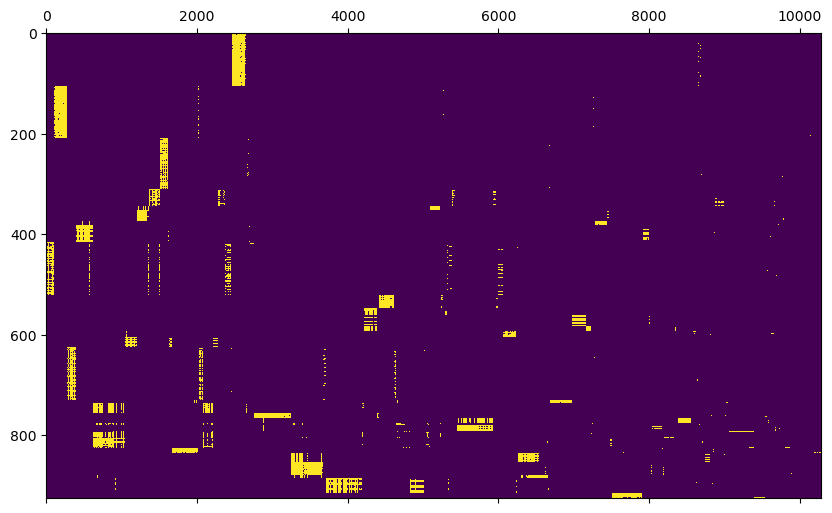

In [28]:
plt.figure(figsize=(10,6))
plt.matshow(s_vectors[idx], fignum=1,  aspect='auto')

In [29]:
seq_gene_coord = {}
gene_names = set()
with open("/results/pgr-out/MHC_C2_gene_with_type_matches.bed") as f:
    for r in f:
        r = r.strip().split()
        if r[0] not in included:
            continue
        seq_gene_coord.setdefault(r[0], [])
        seq_gene_coord[r[0]].append( (int(r[1]), int(r[2]), r[3]) )
        gene_names.add(r[3])
gene_names = list(gene_names)
gene_names.sort()

In [30]:
gene_names

['DMA*01',
 'DMB*01',
 'DOB*01',
 'DQA1*01',
 'DQA1*02',
 'DQA1*03',
 'DQA1*04',
 'DQA1*05',
 'DQA2*01',
 'DQB1*02',
 'DQB1*03',
 'DQB1*04',
 'DQB1*05',
 'DQB1*06',
 'DRA*01',
 'DRB1*01',
 'DRB1*03',
 'DRB1*04',
 'DRB1*07',
 'DRB1*08',
 'DRB1*09',
 'DRB1*10',
 'DRB1*11',
 'DRB1*12',
 'DRB1*13',
 'DRB1*14',
 'DRB1*15',
 'DRB1*16',
 'DRB3*01',
 'DRB3*02',
 'DRB3*03',
 'DRB4*01',
 'DRB5*01',
 'DRB5*02']

In [31]:
from collections import Counter
from matplotlib.colors import to_hex

In [32]:
import numpy as np
from matplotlib import cm
cmap=plt.get_cmap("nipy_spectral")
color_theme = cmap(np.linspace(0.1, 0.9, len(gene_names)))
g_color = {}
i = 0
for i,g in enumerate(gene_names):
    g_color[g]=to_hex(color_theme[i])
    

In [33]:
out_type_list2 = {}
for seq_name, bgn, end, t in out_type_list:
  
    out_type_list2.setdefault(seq_name, [])
    out_type_list2[seq_name].append((seq_name, bgn, end, t))
f = open("/results/pgr-out/MHC-C2_gene_color.bed", "w")
for ctg_name in out_type_list2:
    for seq_name, bgn, end, t in out_type_list2[ctg_name]:
        color = g_color[t]
        print(ctg_name, bgn, end, color, sep="\t", file=f)
f.close()

DMA*01 #870098
DMB*01 #4d00a0
DOB*01 #0300aa
DQA1*01 #0000c1
DQA1*02 #0000d9
DQA1*03 #002fdd
DQA1*04 #0067dd
DQA1*05 #0085dd
DQA2*01 #0095dd
DQB1*02 #009fcb
DQB1*03 #00a7b3
DQB1*04 #00aaa0
DQB1*05 #00aa8d
DQB1*06 #00a55d
DRA*01 #009d1d
DRB1*01 #00a200
DRB1*03 #00b200
DRB1*04 #00c400
DRB1*07 #00d400
DRB1*08 #00e400
DRB1*09 #00f400
DRB1*10 #1dff00
DRB1*11 #84ff00
DRB1*12 #c4fc00
DRB1*13 #dcf400
DRB1*14 #f0ea00
DRB1*15 #f8da00
DRB1*16 #ffc500
DRB3*01 #ffad00
DRB3*02 #ff8d00
DRB3*03 #ff4500
DRB4*01 #fe0000
DRB5*01 #ec0000
DRB5*02 #dc0000


(0.0, 50.0, -350.0, 10.0)

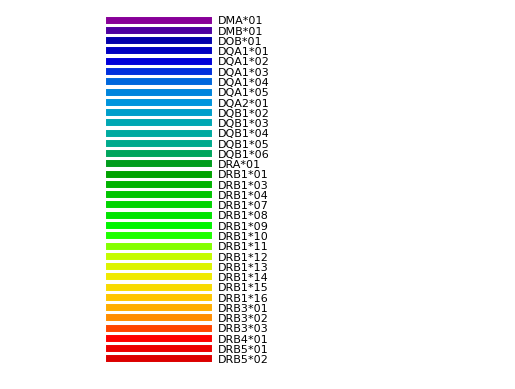

In [34]:
plt.figure()
y = 0
for g in sorted(list(g_color.keys())):
    plt.text(21, y-4, g, fontsize=8)
    plt.plot( [10,20],[y,y], c=g_color[g], linewidth=5)
    y-=10
    print(g, g_color[g])
plt.xlim(0,50)
plt.ylim(y-10,10)
plt.axis("off")

In [35]:
f = open(f"/wd/results/pgr-out/MHC-C2_gene_annotation.2.ord", "w")
haplotypes = {}
ctg_to_haplotype = {}
for ctg_name in seq_gene_coord:
 
    seq_gene_coord[ctg_name].sort()
    
    annotation = []
    raw_annotation = []
    for bgn, end, gene in seq_gene_coord[ctg_name]:
        color = g_color[gene]
        annotation.append(f"""<tspan style="fill:{color};font-weight:bold">"""+gene+"</tspan>")
        #gene = gene.split("*")[0]
        raw_annotation.append(gene)
    key = tuple(raw_annotation)
    haplotypes.setdefault(key, [])
    haplotypes[key].append(ctg_name)
    ctg_to_haplotype[ctg_name] = tuple(raw_annotation)
    name = ".".join(ctg_name.split(".")[:2])
    print(ctg_name, "-".join(annotation)+"""<tspan style="fill:black;font-weight:bold">  """+name+"</tspan>", sep="\t", file=f)
f.close()

In [36]:
q_idx="000"
q_name="MHC-C2"
fasta_file = f"/wd/results/pgr-out/pg_seqs.{q_idx}.fa"
prefix = f"{q_name}_pg_seqs.{q_idx}."
bed_file = f"/wd/results/pgr-out/{prefix}bed"
track_range=800000
os.system(f"""/wd/code/pgr-pbundle-bed2svg {bed_file} /wd/results/pgr-out/svg/{prefix}hc.2. \
          --track-range {track_range} --track-tick-interval 100000 \
          --track-panel-width 800 --annotation-panel-width 850 --stroke-width 1.2 \
          --annotation-region-bedfile /results/pgr-out/MHC-C2_gene_color.bed \
          --annotations /wd/results/pgr-out/MHC-C2_gene_annotation.2.ord --ddg-file /wd/results/pgr-out/{prefix}ddg""")

0

In [37]:
SVG(f"/wd/results/pgr-out/svg/{prefix}hc.2.svg")

In [38]:

for haplotype, ctgs in haplotypes.items():
    if len(ctgs) >= 3:
        print("-".join(haplotype), len(ctgs))

existing = set()
hts = {}
for ctg_name in seq_gene_coord:
 
    seq_gene_coord[ctg_name].sort()
    
    annotation = []
    raw_annotation = []
    for bgn, end, gene in seq_gene_coord[ctg_name]:
        color = g_color[gene]
        annotation.append(f"""<tspan style="fill:{color};font-weight:bold">"""+gene+"</tspan>")
        #gene = gene.split("*")[0]
        raw_annotation.append(gene)
        
    ht = tuple(raw_annotation)
    
    if len(haplotypes[ht]) >= 3 and ht not in existing:
        existing.add(ht)
        name = ".".join(ctg_name.split(".")[:2])
        hts[ctg_name] = ( (ht, ctg_name, "-".join(annotation)+""" <tspan style="fill:black;font-weight:bold">"""+name+"</tspan>" + " {}".format(len(haplotypes[ht]))) )
        
f = open(f"/wd/results/pgr-out/MHC-C2_gene_annotation.3.ord", "w")

hts2 = []
with open("/results/pgr-out/MHC-C2_pg_seqs.000.ddg") as f2:
    for r in f2:
        r = r.strip().split()
        if r[0] != "L":
            continue
        ctg_name = r[2]
        if ctg_name in hts:
            hts2.append(hts[ctg_name])


for _, ctg_name, annotation in hts2:
    print(ctg_name, annotation, sep="\t", file=f)
f.close()

DRA*01-DRB1*10-DQA1*01-DQB1*05-DQA2*01-DOB*01-DMB*01-DMA*01 3
DRA*01-DRB4*01-DRB1*04-DQA1*03-DQB1*03-DQA2*01-DOB*01-DMB*01-DMA*01 9
DRA*01-DRB4*01-DRB1*09-DQA1*03-DQB1*03-DQA2*01-DOB*01-DMB*01-DMA*01 4
DRA*01-DRB3*02-DRB1*11-DQA1*05-DQB1*03-DQA2*01-DOB*01-DMB*01-DMA*01 7
DRA*01-DRB1*01-DQA1*01-DQB1*05-DQA2*01-DOB*01-DMB*01-DMA*01 5
DRA*01-DRB3*02-DRB1*03-DQA1*05-DQB1*02-DQA2*01-DOB*01-DMB*01-DMA*01 8
DRA*01-DRB3*02-DRB1*13-DQA1*05-DQB1*03-DQA2*01-DOB*01-DMB*01-DMA*01 4
DRA*01-DRB3*01-DRB1*13-DQA1*01-DQB1*06-DQA2*01-DOB*01-DMB*01-DMA*01 4
DRA*01-DRB4*01-DRB1*07-DQA1*02-DQB1*02-DQA2*01-DOB*01-DMB*01-DMA*01 4
DRA*01-DRB5*01-DRB1*15-DQA1*01-DQB1*06-DQA2*01-DOB*01-DMB*01-DMA*01 7
DRA*01-DRB3*03-DRB1*13-DQA1*01-DQB1*06-DQA2*01-DOB*01-DMB*01-DMA*01 5
DRA*01-DRB3*01-DRB1*14-DQA1*05-DQB1*03-DQA2*01-DOB*01-DMB*01-DMA*01 3
DRA*01-DRB3*01-DRB1*03-DQA1*05-DQB1*02-DQA2*01-DOB*01-DMB*01-DMA*01 4
DRA*01-DRB3*01-DRB1*03-DQA1*04-DQB1*04-DQA2*01-DOB*01-DMB*01-DMA*01 5
DRA*01-DRB4*01-DRB1*09-DQA1*03-DQB1*

In [39]:
q_idx="000"
q_name="MHC-C2"
fasta_file = f"/wd/results/pgr-out/pg_seqs.{q_idx}.fa"
prefix = f"{q_name}_pg_seqs.{q_idx}."
bed_file = f"/wd/results/pgr-out/{prefix}bed"
track_range=800000
os.system(f"""/wd/code/pgr-pbundle-bed2svg {bed_file} /wd/results/pgr-out/svg/{prefix}hc.3. \
          --track-range {track_range} --track-tick-interval 100000 \
          --track-panel-width 800 --annotation-panel-width 800 --stroke-width 1.2 \
          --annotation-region-bedfile /results/pgr-out/MHC-C2_gene_color.bed \
          --annotation-region-stroke-width 3.2 \
          --annotations /wd/results/pgr-out/MHC-C2_gene_annotation.3.ord""")

0

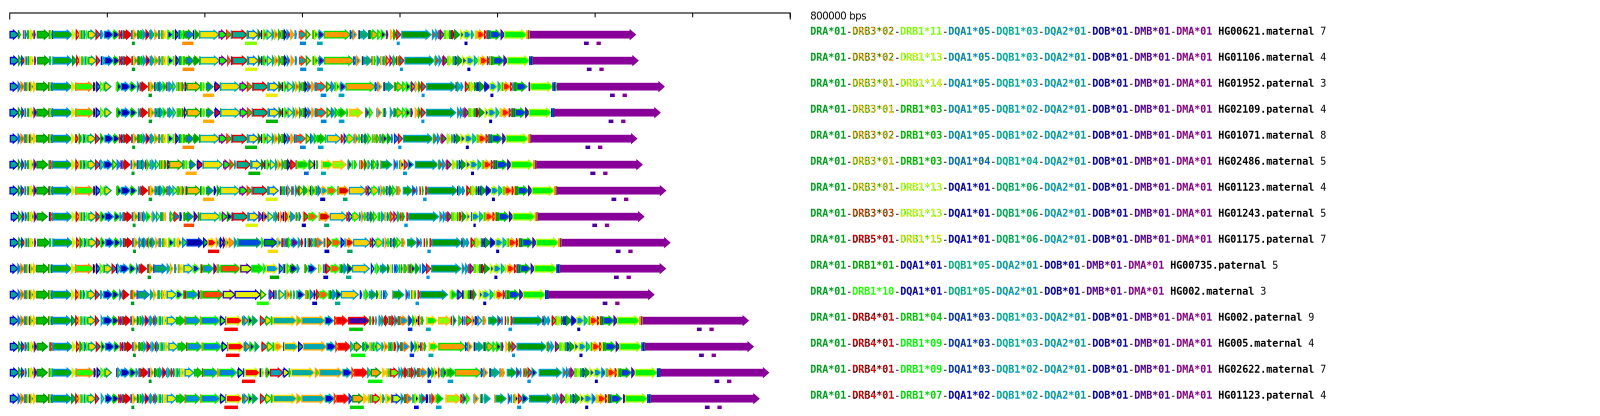

In [40]:
SVG(f"/wd/results/pgr-out/svg/{prefix}hc.3.svg")

## PCA analysis

In [41]:
from sklearn.decomposition import PCA

In [42]:
shmmrspec = {"w": 48, "k":56, "r":9, "min_span":12 }
sdb = pgrtk.SeqIndexDB()
sdb.load_from_fastx("/results/pgr-out/pg_seqs.000.fa",
                    w = shmmrspec["w"], 
                    k = shmmrspec["k"], 
                    r = shmmrspec["r"], 
                    min_span = shmmrspec["min_span"])

In [43]:
sample2eth = {}
ctg_labels = [_[0] for _ in sdb.seq_info.copy().values() if _[0] in included]
with open("/code/HPRC_y1_ethnic.csv") as f:
    for r in f:
        r = r.strip().split()
        sample2eth[r[0]] = r[2]


In [44]:
sid_to_smps = {}
sid_to_sample = {}
sinfo = sdb.seq_info.copy()

for sid in sinfo:
    s = sdb.get_seq_by_id(sid)
    sid_to_smps[sid] = pgrtk.get_shmmr_pairs_from_seq(s, w=48, k=56, r=12, min_span=12)
    ctg, _, _ = sinfo[sid]
    sample = ctg.split(".")[0]
    sid_to_sample[sid] = sample
sid_to_smps = sorted(sid_to_smps.items())

In [45]:
smp_index = {}
idx = 0

for sid, smps in sid_to_smps:
    if sid not in full_length_sids:
        continue
    for smp in smps:
        smp = tuple(smp[:2])
        if smp not in smp_index:
            smp_index[smp] = idx
            idx += 1

In [46]:

seq_info = sdb.seq_info.copy()

sinfo = list(seq_info.items())
sinfo.sort(key=lambda x: x[1][0])
full_length_sids =  [_[0] for _ in sinfo if _[1][0] in included]

index_to_sid = dict([(_[0], _[1]) for _ in enumerate(list(full_length_sids))])
sid_to_index = dict([(_[1], _[0]) for _ in enumerate(list(full_length_sids))])
s_vectors = np.zeros( (len(sid_to_index), len(smp_index)))

#ctg_labels = [""]*len(sid_to_smps)


for sid, smps in sid_to_smps:
    if sid not in full_length_sids:
        continue

    ctg, src, _ = seq_info[sid]
    idx = sid_to_index[sid]

  
    for smp in smps:
        node = smp[0], smp[1]
        direction = smp[4]    
        s_vectors[idx, smp_index[node]] += 1
    #ctg_labels[sid]=ctg
    
samples = {}
for sid, smps in sid_to_smps:
    if sid in sid_to_index:
        ctg, src, _ = seq_info[sid]
        s = ctg.split(".")[0]
        samples.setdefault(s, [])
        samples[s].append(sid)
       

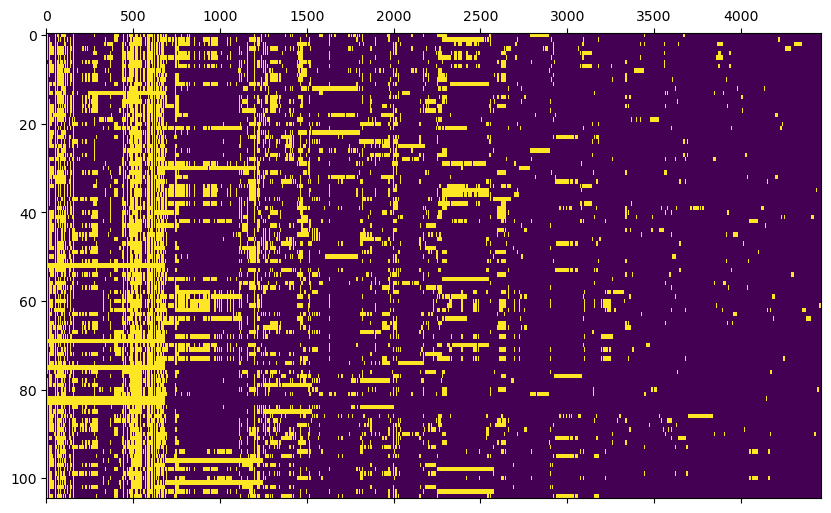

In [47]:
plt.figure(figsize=(10,6))
plt.matshow(s_vectors, fignum=1,  aspect='auto')

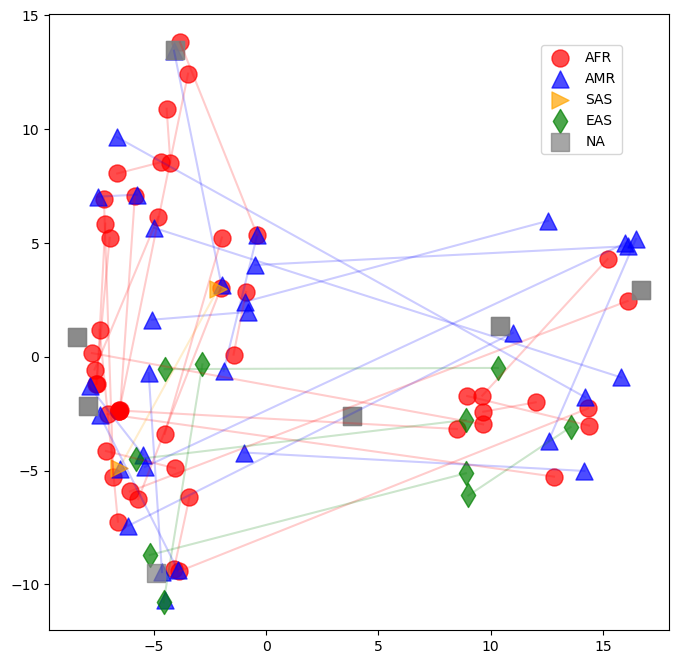

In [48]:
pca = PCA(n_components=2)
comp = pca.fit_transform(s_vectors)
[x, y] = zip( *[ (_[0], _[1]) for _ in comp ] )

c_map = {"AFR":"red", "AMR": "blue", "SAS": "orange", "EAS":"green", "NA":"gray" }
m_map = {"AFR":"o", "AMR": "^", "SAS": ">", "EAS":"d", "NA":"s" }
colors = []

ax=plt.figure(figsize=(8,8))

for eth, color in c_map.items():
    xx = []
    yy = []
    for i in range(len(x)):
        #plt.text(x[i], y[i], eths[i])
        sample = sid_to_sample[index_to_sid[i]]
        #print(sample)
        #if sample not in sample2eth:
        #    continue
        if sample2eth.get(sample, "NA") != eth:
            continue
        #print(i, eths[i])
        #if i in id_of_interests:
        xx.append(x[i])
        yy.append(y[i])
    plt.scatter(xx, yy, alpha=0.7, marker=m_map[eth], c=color, s=150, label=eth)
    
    
xx = np.array(x)
yy = np.array(y)

for s in samples:
    if len(samples[s]) == 2:
        sid0, sid1 = samples[s]
        idx0 = sid_to_index[sid0]
        idx1 = sid_to_index[sid1]
        e = sample2eth[s]
        c = c_map[e]
        plt.plot((xx[idx0], xx[idx1]), (yy[idx0], yy[idx1]), alpha=0.2, color=c)
        
ax.legend(bbox_to_anchor=(0.850, 0.85), loc="upper right")

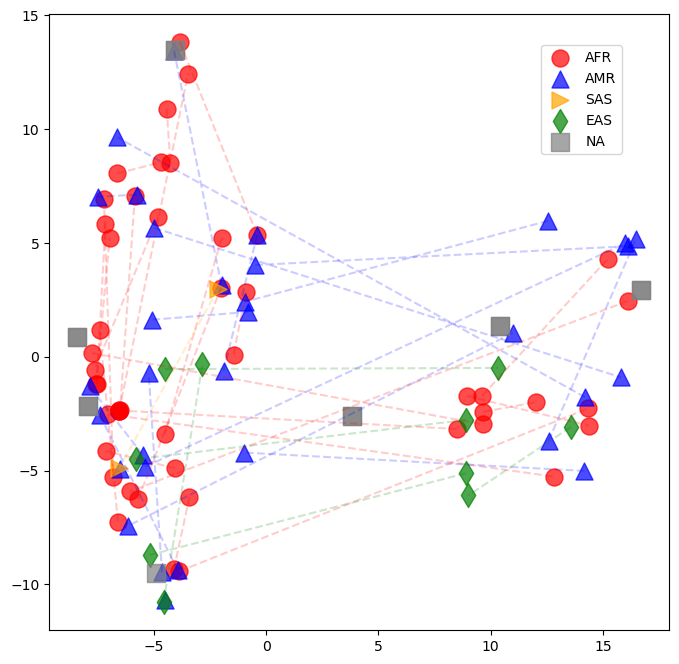

In [49]:
pca = PCA(n_components=2)
comp = pca.fit_transform(s_vectors)
[x, y] = zip( *[ (_[0], _[1]) for _ in comp ] )

c_map = {"AFR":"red", "AMR": "blue", "SAS": "orange", "EAS":"green", "NA":"gray" }
m_map = {"AFR":"o", "AMR": "^", "SAS": ">", "EAS":"d", "NA":"s" }
colors = []

ax=plt.figure(figsize=(8,8))

for eth, color in c_map.items():
    xx = []
    yy = []
    for i in range(len(x)):
        #plt.text(x[i], y[i], eths[i])
        sample = sid_to_sample[index_to_sid[i]]
        #print(sample)
        #if sample not in sample2eth:
        #    continue
        if sample2eth.get(sample, "NA") != eth:
            continue
        #print(i, eths[i])
        #if i in id_of_interests:
        xx.append(x[i])
        yy.append(y[i])
    plt.scatter(xx, yy, alpha=0.7, marker=m_map[eth], c=color, s=150, label=eth)
    
    
xx = np.array(x)
yy = np.array(y)

for s in samples:
    if len(samples[s]) == 2:
        sid0, sid1 = samples[s]
        idx0 = sid_to_index[sid0]
        idx1 = sid_to_index[sid1]
        e = sample2eth[s]
        c = c_map[e]
        plt.plot((xx[idx0], xx[idx1]), (yy[idx0], yy[idx1]), "--", alpha=0.2, color=c)
        
ax.legend(bbox_to_anchor=(0.850, 0.85), loc="upper right")

In [50]:
haplotypes2 = {}
for ht in haplotypes:
    ht2 = tuple([_.split("*")[0] for _ in ht])
    haplotypes2.setdefault(ht2, [])
    haplotypes2[ht2].extend(haplotypes[ht])

('DRA', 'DRB1', 'DQA1', 'DQB1', 'DQA2', 'DOB', 'DMB', 'DMA')
('DRA', 'DRB3', 'DRB1', 'DQA1', 'DQB1', 'DQA2', 'DOB', 'DMB', 'DMA')
('DRA', 'DRB4', 'DRB1', 'DQA1', 'DQB1', 'DQA2', 'DOB', 'DMB', 'DMA')
('DRA', 'DRB5', 'DRB1', 'DQA1', 'DQB1', 'DQA2', 'DOB', 'DMB', 'DMA')


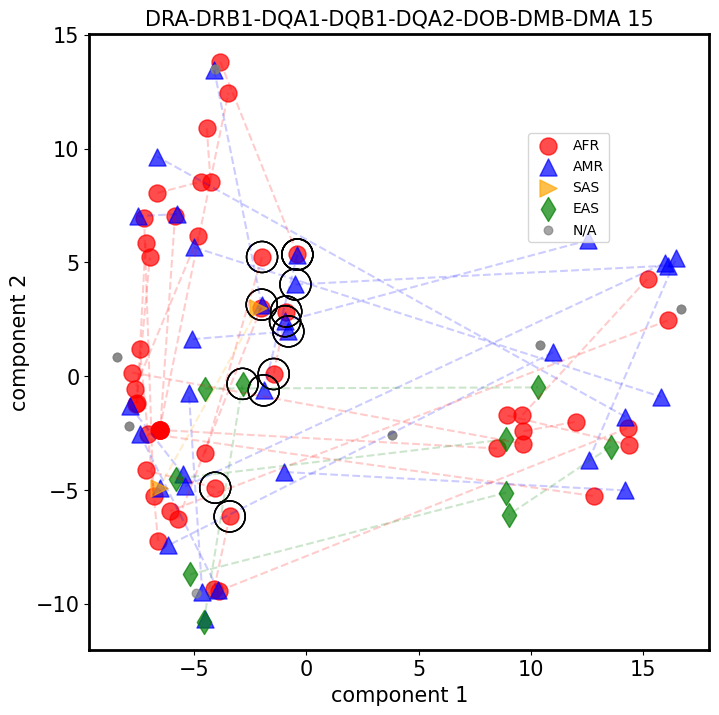

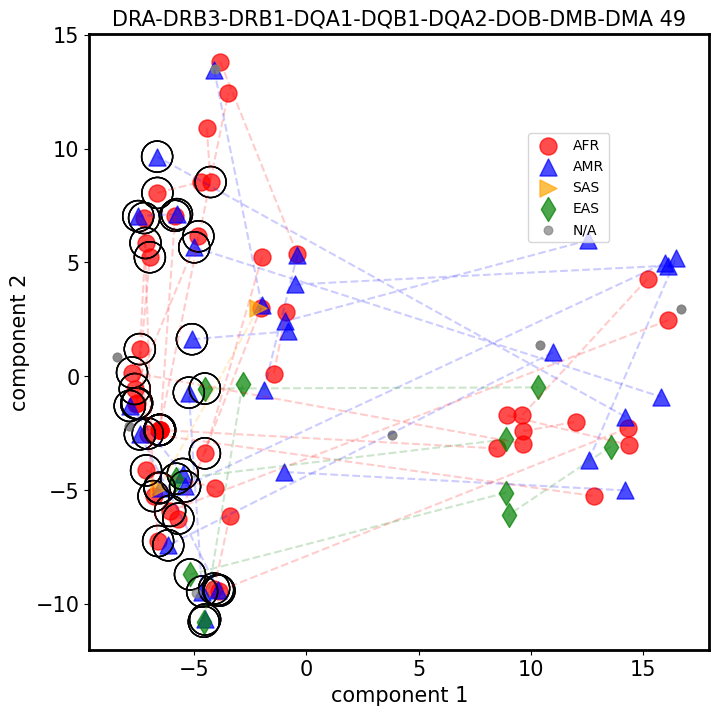

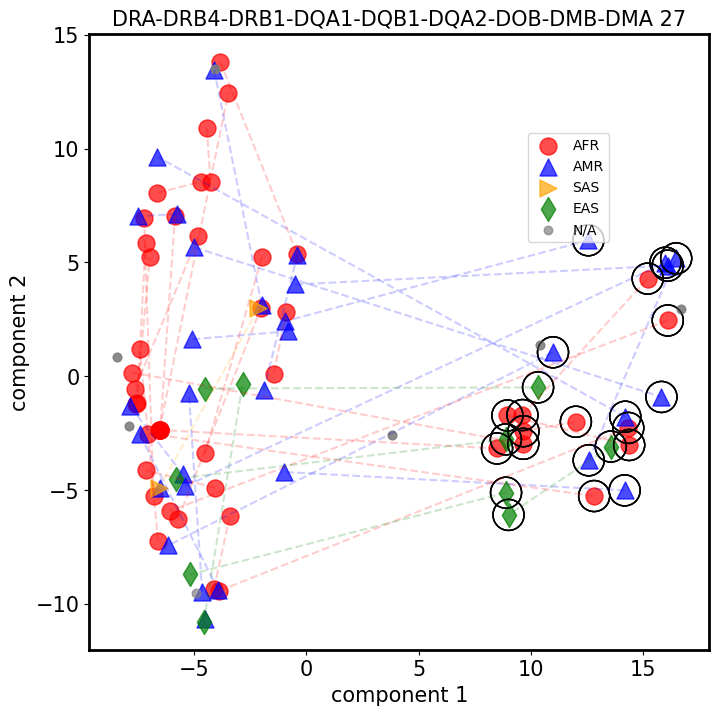

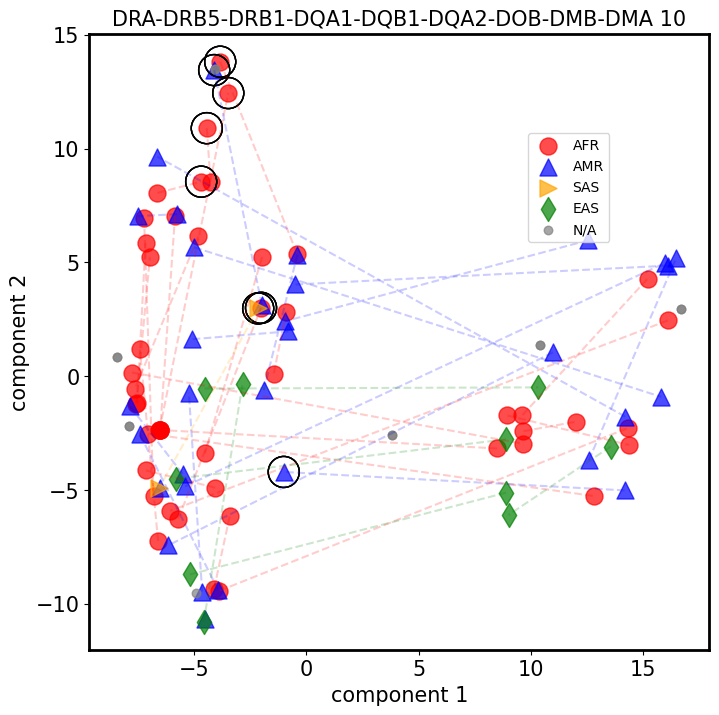

In [51]:
pca = PCA(n_components=2)
comp = pca.fit_transform(s_vectors)
[x, y] = zip( *[ (_[0], _[1]) for _ in comp ] )

c_map = {"AFR":"red", "AMR": "blue", "SAS": "orange", "EAS":"green", "N/A":"gray" }
m_map = {"AFR":"o", "AMR": "^", "SAS": ">", "EAS":"d", "N/A":"." }
colors = []
haplotypes_keys = list(haplotypes2.keys())
haplotypes_keys.sort()
for ht in haplotypes_keys:
    if len(haplotypes2[ht]) < 3:
        continue
    print(ht)
    plt.figure(figsize=(8,8))
    ax=plt.subplot(111)
    for eth, color in c_map.items():
        xx = []
        yy = []
        for i in range(len(x)):
            #plt.text(x[i], y[i], eths[i])
            sample = sid_to_sample[index_to_sid[i]]
            #print(sample)
            #if sample not in sample2eth:
            #    continue
            if sample2eth.get(sample, "N/A") != eth:
                continue
            #if i in id_of_interests:
            xx.append(x[i])
            yy.append(y[i])
        plt.scatter(xx, yy, alpha=0.7, marker=m_map[eth], c=color, s=150, label=eth)
        
        xx = []
        yy = []
        for i in range(len(x)):
            sample = sid_to_sample[index_to_sid[i]]
            if sample not in sample2eth:
                continue
            ctg, _, _ = seq_info[index_to_sid[i]]
            if ctg in haplotypes2[ht]:
                #print(ctg)
                xx.append(x[i])
                yy.append(y[i])
        plt.scatter(xx, yy, alpha=0.7, marker="o", c='none', edgecolors="black", s=500)


    xx = np.array(x)
    yy = np.array(y)

    for s in samples:
        if len(samples[s]) == 2:
            sid0, sid1 = samples[s]
            idx0 = sid_to_index[sid0]
            idx1 = sid_to_index[sid1]
            e = sample2eth[s]
            c = c_map[e]
            plt.plot((xx[idx0], xx[idx1]), (yy[idx0], yy[idx1]), "--", alpha=0.2, color=c)
    
    ax.legend(bbox_to_anchor=(0.850, 0.85), loc="upper right")
    plt.title("{} {}".format("-".join(ht), len(haplotypes2[ht])), fontdict={"fontsize":15})
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    plt.xlabel("component 1", fontsize=15)
    plt.ylabel("component 2", fontsize=15)
    

    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)